# Problem set 4


Emily Ernst

Problem Set 4: Attitudes about U.S. Government Spending in Individual Disaster Relief by Income

15 March, 2024

In [77]:
cd /Users/emilyernst/Desktop/garden

/Users/emilyernst/Desktop/garden


In [78]:
use "/Users/emilyernst/Desktop/garden/potentialdata/GSS/GSS2006.dta" , clear

In [80]:
eststo clear
ds natdiscm natdisin race rincome sex educ

natdiscm  natdisin  race      rincome   sex       educ


In [81]:
keep natdiscm natdisin race rincome sex educ

## 1. Visually assess heteroscedasticity [1 pt]

    A. Create a scatterplot of a dependent variable and independent variable of interest from a dataset of your choice.
    

    B. Include a fitted line with an area graph of the confidence interval for the prediction.
    
    C. Write a couple sentences describing how the distribution of the data in the graph does or does not appear to be heteroscedastic.


In [36]:
codebook natdiscm natdisin 


-------------------------------------------------------------------------------
natdiscm                   should rebuilding community in disaster be govt resp
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: NATDISCA

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 0/4,510
       Unique mv codes: 3                        Missing .*: 3,017/4,510

            Tabulation: Freq.   Numeric  Label
                        1,333         1  should
                          160         2  should not be
                           24        .d  don't know
                        2,992        .i  iap
                            1        .n  no answer

-------------------------------------------------------------------------------
natdisin                    should helping ppl in natural disaster be govt resp
--------------------

In [38]:
codebook gov_rebuild


-------------------------------------------------------------------------------
gov_rebuild                                                         (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 0/4,510
       Unique mv codes: 3                        Missing .*: 3,017/4,510

            Tabulation: Freq.  Value
                        1,333  1
                          160  2
                           24  .d
                        2,992  .i
                            1  .n


In [83]:
replace gov_rebuild=. if natdiscm==.d
replace gov_rebuild=. if natdiscm==.i
replace gov_rebuild=. if natdiscm==.n

(24 real changes made, 24 to missing)
(2,992 real changes made, 2,992 to missing)
(1 real change made, 1 to missing)


In [84]:
replace gov_rebuild=0 if natdiscm==2
replace gov_rebuild=1 if natdiscm==1

(160 real changes made)
(0 real changes made)


In [85]:
tab gov_rebuild natdiscm, missing


gov_rebuil |  should rebuilding community in disaster be govt resp
         d |    should  should no  don't kno        iap  no answer |     Total
-----------+-------------------------------------------------------+----------
         0 |         0        160          0          0          0 |       160 
         1 |     1,333          0          0          0          0 |     1,333 
         . |         0          0         24      2,992          1 |     3,017 
-----------+-------------------------------------------------------+----------
     Total |     1,333        160         24      2,992          1 |     4,510 


In [86]:
gen gov_disrelief=natdisin
replace gov_disrelief=. if natdisin==.d
replace gov_disrelief=. if natdisin==.i
replace gov_disrelief=. if natdisin==.n

(3,011 missing values generated)
(18 real changes made, 18 to missing)
(2,992 real changes made, 2,992 to missing)
(1 real change made, 1 to missing)


In [87]:
replace gov_disrelief=0 if natdisin==2
replace gov_disrelief=1 if natdisin==1

(131 real changes made)
(0 real changes made)


In [88]:
tab gov_disrelief natdisin, missing


gov_disrel |  should helping ppl in natural disaster be govt resp
       ief |    should  should no  don't kno        iap  no answer |     Total
-----------+-------------------------------------------------------+----------
         0 |         0        131          0          0          0 |       131 
         1 |     1,368          0          0          0          0 |     1,368 
         . |         0          0         18      2,992          1 |     3,011 
-----------+-------------------------------------------------------+----------
     Total |     1,368        131         18      2,992          1 |     4,510 


In [89]:
label define gov_disrelief 0 "No" 1 "Yes"

In [90]:
label values gov_disrelief gov_disrelief

In [91]:
codebook gov_disrelief


-------------------------------------------------------------------------------
gov_disrelief                                                       (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: gov_disrelief

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 3,011/4,510

            Tabulation: Freq.   Numeric  Label
                          131         0  No
                        1,368         1  Yes
                        3,011         .  


In [92]:
codebook race


-------------------------------------------------------------------------------
race                                                         race of respondent
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: RACE

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 0/4,510

            Tabulation: Freq.   Numeric  Label
                        3,284         1  white
                          634         2  black
                          592         3  other


In [93]:
label define race 1 "white" 2 "Black" 3 "other"

In [94]:
label values race race

In [95]:
%set graph_height = 8

In [96]:
%set graph_width = 11

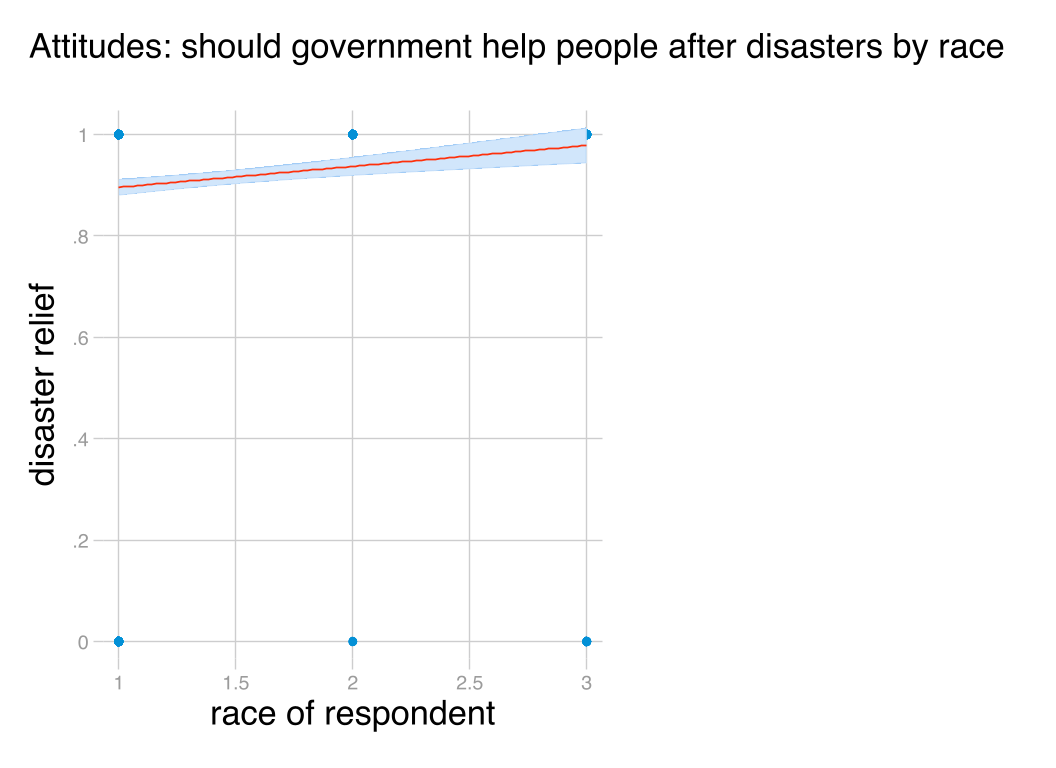

In [97]:
* PART A & B: Scatterplot between a nominal dependent variable and a nominal independent variable
* gov_disrelief and race
tw (scatter gov_disrelief race) ///
(lfitci gov_disrelief race), ///
ytitle(disaster relief, size(large)) ///
xtitle(,size(large)) legend(off) scheme(538w) ///
title("Attitudes: should government help people after disasters by race" " ", span size(large)) ///
aspect(1, place(west))

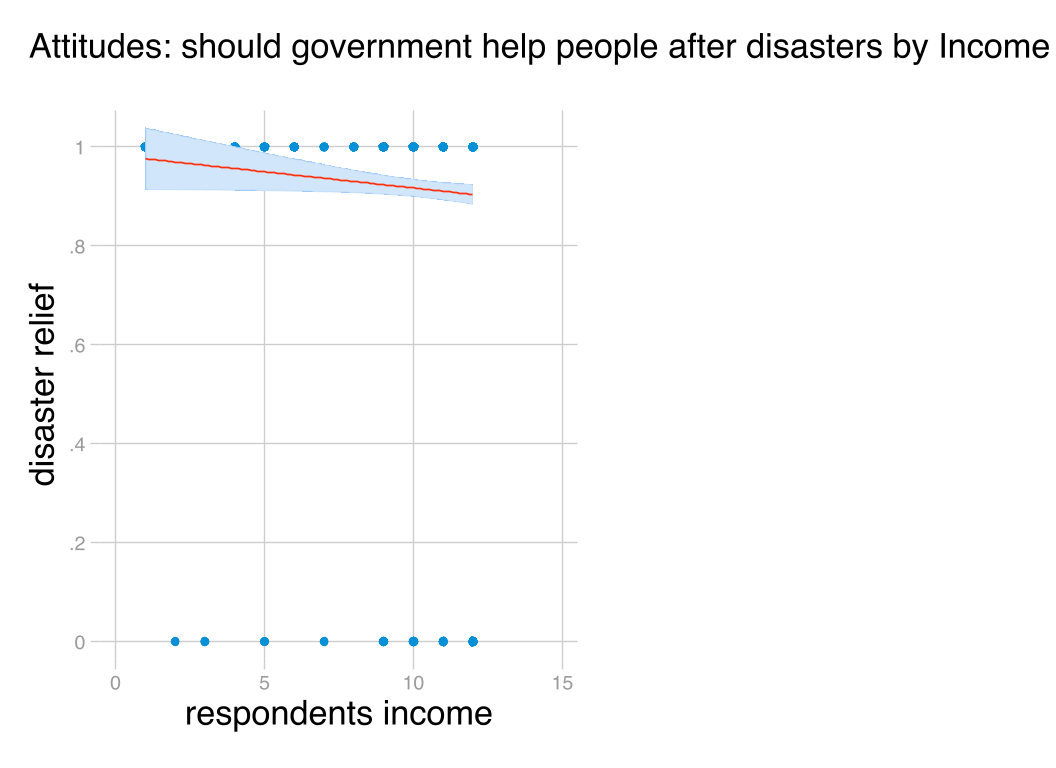

In [98]:
* PART A & B: Scatterplot between a nominal dependent variable and an interval ratio independent variable
* gov_disrelief and race
tw (scatter gov_disrelief rincome) ///
(lfitci gov_disrelief rincome), ///
ytitle(disaster relief, size(large)) ///
xtitle(,size(large)) legend(off) scheme(538w) ///
title("Attitudes: should government help people after disasters by Income" " ", span size(large)) ///
aspect(1, place(west))

In [99]:
tab rincome


           respondents income |      Freq.     Percent        Cum.
------------------------------+-----------------------------------
                 under $1,000 |         53        1.99        1.99
             $1,000 to $2,999 |         75        2.81        4.80
             $3,000 to $3,999 |         47        1.76        6.56
             $4,000 to $4,999 |         53        1.99        8.54
             $5,000 to $5,999 |         41        1.54       10.08
             $6,000 to $6,999 |         42        1.57       11.65
             $7,000 to $7,999 |         37        1.39       13.04
             $8,000 to $9,999 |         61        2.29       15.32
           $10,000 to $14,999 |        231        8.65       23.98
           $15,000 to $19,999 |        221        8.28       32.26
           $20,000 to $24,999 |        248        9.29       41.55
              $25,000 or more |      1,560       58.45      100.00
------------------------------+------------------------------

In [ ]:
**I ran scatter plots for two bivariate relationships and saw little heteroscadacity between both nominal and interval ///
**independent variables (race and realrincome) on my nominal variable (gov_disrelief). By eyeballing, it looks like ///
**though the plots aren't displaying anything interpretable/significant we can see that the estimates are equidistant from///
**the fitted line.

## 2. Test for heteroscedasticity [1 pt]

    A. Do a Breusch-Pagan postestimation test for heteroscedasticity in your dependent variable and independent variable relationship.

    B. Reestimate the regression after logging the DV or IV if appropriate and do another Breusch-Pagan test. Does logging reduce heteroscedasticity?

In [100]:
*PART A: Breusch-Pagan test
// Running basic regression first before doing any postestimation command

quietly reg gov_disrelief rincome 
estat hettest


Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of gov_disrelief

H0: Constant variance

    chi2(1) =  19.14
Prob > chi2 = 0.0000


In [ ]:
WHAT CHARLIE STATED IN LECTURE: "A large chi2 statistic and low probability for chi2 indicates that ///
heteroskedasticity is a problem."

Why is this? The Breusch-Pagan test has a null hypothesis that the variance of the residuals is constant. ///
The alternative hypothesis is that the variance of the residuals is NOT constant (which is heteroscedasticity). ///
If the p-value is less than 0.05, you can reject the null hypothesis.

LOOKING AT MINE: (focusing on the p-value)

Degrees of freedom is 1 (representing that I have only one independent variable in my model).
Since the p-value of 0.0000 is less than 0.05, I am rejecting the null hypothesis of constant variance. ///
This suggests that there is statistically significant evidence of heteroscedasticity in my model.

In [70]:
*PART B: Logging ind variable

gen rincomeln = log(rincome)

quietly reg gov_disrelief rincomeln 
estat hettest

(1,841 missing values generated)

Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of gov_disrelief

H0: Constant variance

    chi2(1) =  17.80
Prob > chi2 = 0.0000


In [ ]:
*after logging income, the test shows that there is still heteroscedacity present 

## 3. Boot strap your standard errors [1 pt.]

    A. Quietly reestimate your regression coefficient with convential OLS and store the results.
    
    B. Quietly reestimate your regression with bootstrapped standard errors and store the results.
    
    C. Use esttab to output the results of the two models and tell us how the bootstrap standard erros differ from the conventional results.
    
    D. Explain in your own words what the bootstrap procedure is doing and why it yields similar or different standard errors to the convential model.

In [71]:
*PART A: Basic OLS

eststo: quietly reg gov_disrelief rincomeln 


(est1 stored)


In [73]:
*PART B: OLS with Bootstrapped standard errors

eststo: quietly bootstrap _b[rincomeln], rep(1000) nodots : ///
    reg gov_disrelief rincomeln 

(est2 stored)


In [74]:
* PART C: Creating the table

esttab, ///
mlabels("OLS" "Bootstrap") ///
collabels(none)  ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


--------------------------------------------
                      (1)             (2)   
                      OLS       Bootstrap   
--------------------------------------------
rincomeln           -0.04^                  
                   (0.02)                   
_bs_1                               -0.04** 
                                   (0.01)   
_cons                1.00***                
                   (0.04)                   
--------------------------------------------
N                     923             923   
--------------------------------------------


In [ ]:
There is no change between the standard error, and a very small decrease in the bootstrap estimate which indicates that ///
OLS is already robust on its own, even with the uncertainty of variability within my coefficient. However, the statistical ///
significance decreases in the bootstrap coefficient. 
This means that my original SEs already provide a good estimate of the variability in my data, and the bootstrap sample ///
that was generated is very similar to the original sample, but I am unsure what the change in statistical probability indicates.

## 4. Estimate robust standard errors [1 pt]

    A. Reestimate your model with robust standard errors and store the results.
    
    B. Use esttab to output the results of the robust model alongside the conventional and bootstrap models and explain how the the results compare in 1 or 2 sentences.
    
    C. In your own words, explain how the robust standard errors procedure differs from conventional procedures.

In [75]:
*PART A: OLS with Robust SEs

eststo: quietly reg gov_disrelief rincomeln, robust

(est3 stored)


In [76]:
*PART B: Creating the table (again but this time with the new model too)

esttab, ///
mlabels("OLS" "Bootstrap" "Robust") ///
collabels(none)  ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


------------------------------------------------------------
                      (1)             (2)             (3)   
                      OLS       Bootstrap          Robust   
------------------------------------------------------------
rincomeln           -0.04^                          -0.04** 
                   (0.02)                          (0.01)   
_bs_1                               -0.04**                 
                                   (0.01)                   
_cons                1.00***                         1.00***
                   (0.04)                          (0.03)   
------------------------------------------------------------
N                     923             923             923   
------------------------------------------------------------


In [ ]:
There appears to be no change in standard errors between my OLS model and the robust model. This means that weighing the ///
estimates with larger deviations from the best line of fit, and less weight to the smaller deviations didn't change my SEs ///
coefficients. This may indicate that the OLS method may be a good fit for the data, and heteroscedasticity ///
may not actually exist or affect the sampling uncertainty and therefore uneven standard errors.

## 5. Cluster robust standard errors [1 pt]

    A. Explain why or why not your model should be estimated with cluster robust standard errors. If yes, what is the clustering unit and why?
    
    B. If yes, reestimate your model with cluster robust standard errors and use esttab to output the results of the robust model alongside your other models and explain how the the results compare in 1 or 2 sentences.
    
    C. Write a couple sentences explaining what is the best method of standard error estimation for your models and why.
    
//not doing B

 While this may indicate that the OLS method may actually be a good fit for the data, and heteroscedasticity ///
may not actually exist or affect the sampling/standard errors, I will still use the robust standard errors method to ///
strengthen the validity of the model.[code here]

A. My data should not be clustered because the data is cross-sectional (2006 only) so I would not need to time cluster the data. Beyond that, there are too few groups that many people could have differences within. 

B. Skip

C. I believe the best method of standard error estimation is the Robust model. While the little change between my OLS and Robust regression models may indicate that OLS was a good fit for the data, and that observed heteroscedasticity ///
may not actually exist or affect the sampling/standard errors, I will still use the robust standard errors method to ///
strengthen the validity of the model. This model is more appropriate for larger sample sizes, linear models, and if there is evidence of heteroscedasticity which all criteria are relevant to my model. 